In [1]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/12291c548acaf544596795709020e3db/raw/325bdef098bd9cbc2189215b7e32e22f437f29f3/projetos.csv"
dados = pd.read_csv(uri)

dados['finalizado'] = dados["nao_finalizado"].map({1 : 0, 0 : 1})

dados = dados.query('horas_esperadas > 0')

x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

seed = 1256

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state=seed, stratify=y)

print(f"Treinaremos com {len(x_treino)} elementos")
print(f"Testaremos com {len(x_teste)} elementos")

modelo = SVC()
modelo.fit(x_treino, y_treino)
previsoes = modelo.predict(x_teste)

acuracia = accuracy_score(y_teste, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")


Treinaremos com 1617 elementos
Testaremos com 540 elementos
A acurácia foi de 56.48%


In [2]:
x_min = x_teste["horas_esperadas"].min()
x_max = x_teste["horas_esperadas"].max()
y_min = x_teste["preco"].min()
y_max = x_teste["preco"].max()

print(x_min)
print(x_max)
print(y_min)
print(y_max)

1.0
100.0
100.0
28398.0


/home/bernardo.bennemann/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


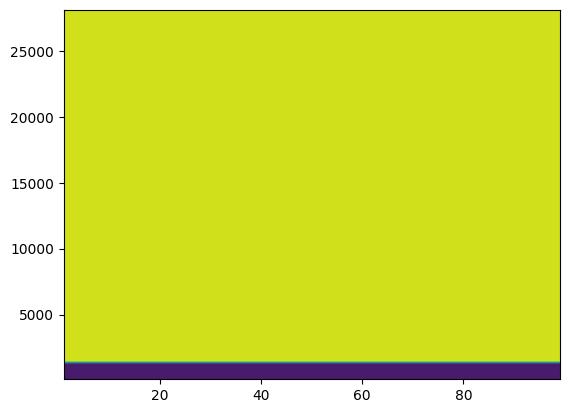

In [5]:
import numpy as np
import matplotlib.pyplot as plt


pixel = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixel)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixel)

xx, yy =np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/12291c548acaf544596795709020e3db/raw/325bdef098bd9cbc2189215b7e32e22f437f29f3/projetos.csv"
dados = pd.read_csv(uri)

dados['finalizado'] = dados["nao_finalizado"].map({1 : 0, 0 : 1})

dados = dados.query('horas_esperadas > 0')

x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

seed = 1256

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state=seed, stratify=y)

print(f"Treinaremos com {len(x_treino)} elementos")
print(f"Testaremos com {len(x_teste)} elementos")

scaler = StandardScaler()
scaler.fit(x_treino)

x_treino = scaler.transform(x_treino)
x_teste = scaler.transform(x_teste)

modelo = SVC()
modelo.fit(x_treino, y_treino)
previsoes = modelo.predict(x_teste)

acuracia = accuracy_score(y_teste, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")


Treinaremos com 1617 elementos
Testaremos com 540 elementos
A acurácia foi de 66.30%


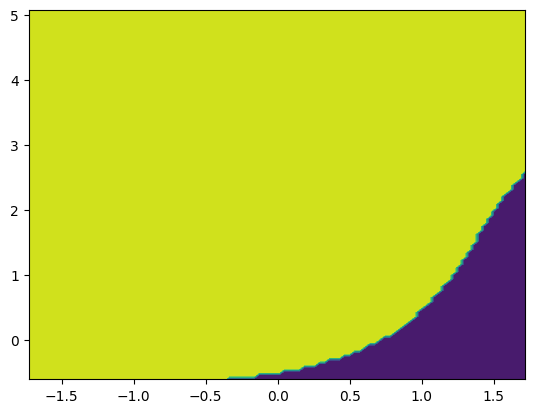

In [7]:
data_col1 = x_teste[:, 0]
data_col2 = x_teste[:, 1]

x_min = data_col1.min()
x_max = data_col1.max()
y_min = data_col2.min()
y_max = data_col2.max()

import numpy as np
import matplotlib.pyplot as plt


pixel = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixel)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixel)

xx, yy =np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z)